# Fourier transform of two superimposed offset Dirac combs of same periodicity

If $\tilde{g}(f)$ is defined like this:

\begin{equation}
    \tilde{g}(f) = \mathcal{F}[g(t)](f)
\end{equation}


Then $\mathcal{F}[g(t+a)](f)$ can be written as:

\begin{equation}
    \mathcal{F}[g(t+a)](f) = e^{2\pi i f a} \cdot \tilde{g}(f)
\end{equation}


The Dirac comb $III_T(t)$ is defined as:

\begin{equation}
    III_T(t) = \sum_{k=-\infty}^{\infty} \delta(t-kT)
\end{equation}


Its Fourier transform is:

\begin{equation}
    \tilde{III_T}(t) = \frac{1}{T} III_{\frac{1}{T}} (f)
\end{equation}


As a direct consequence, a Dirac comb that is offset to the right, $III_T(t-a)$ with $a \in [0, T)$, has the Fourier transform:

\begin{equation}
    \mathcal{F}[III_T(t-a)](f) = e^{-2\pi i f a} \cdot \frac{1}{T} III_{\frac{1}{T}} (f)
\end{equation}


Due to linearity of the FT, the transform of a sum of two Dirac combs reads:

\begin{equation}
    \mathcal{F}[III_T(t) + III_T(t-a)](f) = (1 + e^{-2\pi i f a}) \cdot \frac{1}{T} III_{\frac{1}{T}} (f)
\end{equation}


This is just a complex periodically frequency dependent multiple of the FT of just one Dirac comb. The period length $\Delta f$ of this modulation in the frequency domain is $1/a$, as can be seen from the requirement:

\begin{equation}
    -2\pi i (f+\Delta f) a \stackrel{!}{=} -2\pi i (f a+1) 
\end{equation}


The envelope function for the absolute of the FT of two such superimposed combs is obtained from the modulation factor alone:

\begin{equation}
    |1+e^{-2\pi i f a}| = 2 \cdot |\cos(\pi i f a)|
\end{equation}

## Import stuff

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../packages/')
from grating2 import *
from auxiliary import *

## Define function for making FT of an offset comb

In [10]:
def make_FT_of_offset_comb(pitch, reach, offset, height):
    fct = lambda x : np.exp(2.*np.pi*1j*x * offset) * height * make_comb(pitch, reach)(x)
    return fct

## Define function for making envelope functions for absolutes

In [15]:
def make_abs_envelope(offset):
    fct = lambda x : np.abs(np.cos(np.pi*x*offset))
    return fct

## Calculate and show FT of superimposed Dirac combs

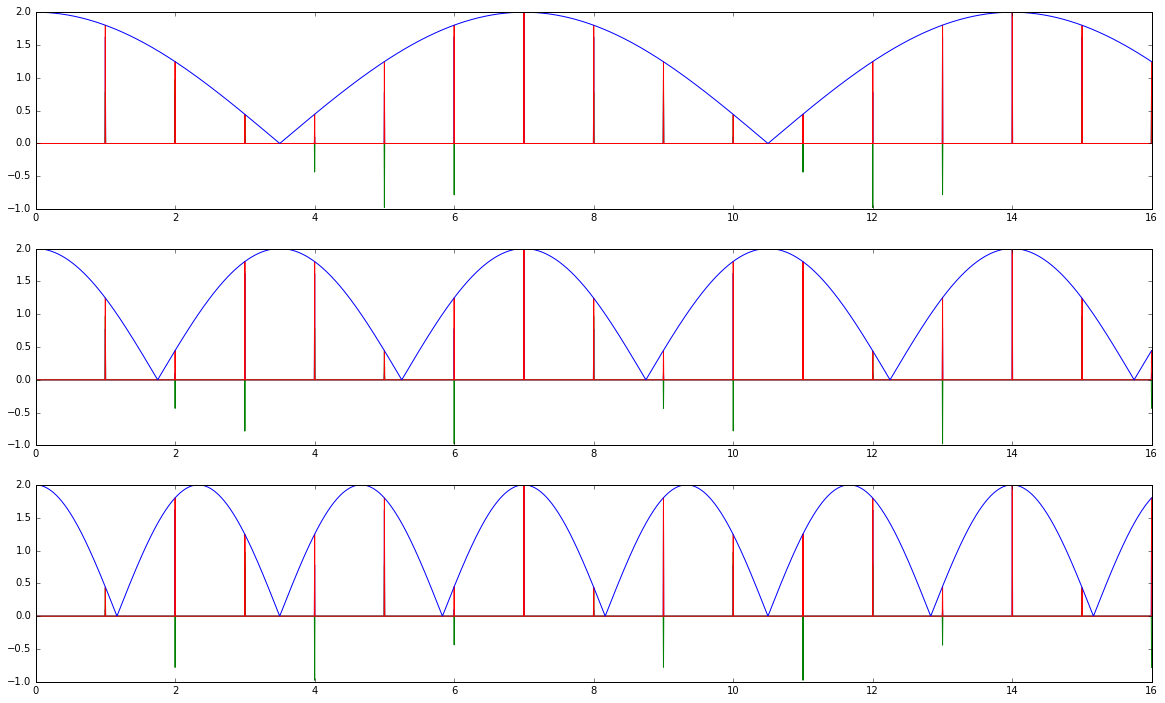

In [16]:
# Define frequency domain
fres    = 4096.
fmin    = 0.
fmax    = 16.
f       = np.linspace(fmin, fmax, fres)

# Define time domain periodicity
T       = 1.
pitch   = 1./T

# Define FT combs of different time offsets and the envelopes
offset1 = 0.*T/7.
height1 = 1.
fct_g1  = make_FT_of_offset_comb(pitch, f[1]-f[0], offset1, height1)
g1      = fct_g1(f)

offset2 = 1.*T/7.
height2 = 1.
fct_g2  = make_FT_of_offset_comb(pitch, f[1]-f[0], offset2, height2)
g2      = fct_g2(f)
fct_e2  = make_abs_envelope(offset2)
e2      = 2.*fct_e2(f)

offset3 = 2.*T/7.
height3 = 1.
fct_g3  = make_FT_of_offset_comb(pitch, f[1]-f[0], offset3, height3)
g3     = fct_g3(f)
fct_e3  = make_abs_envelope(offset3)
e3      = 2.*fct_e3(f)

offset4 = 3.*T/7.
height4 = 1.
fct_g4  = make_FT_of_offset_comb(pitch, f[1]-f[0], offset4, height4)
g4      = fct_g4(f)
fct_e4  = make_abs_envelope(offset4)
e4      = 2.*fct_e4(f)



# Plot
fig = plt.figure(figsize=(20, 12))

#config = {'real':False, 'imag':False, 'abso':False}
config = {'angl':False}

sub1 = fig.add_subplot(3, 1, 1)
plot_complex(f, g1+g2, **config)
plt.plot(f, e2)

sub2 = fig.add_subplot(3, 1, 2)
plot_complex(f, g1+g3, **config)
plt.plot(f, e3)

sub3 = fig.add_subplot(3, 1, 3)
plot_complex(f, g1+g4, **config)
plt.plot(f, e4)
